In [1]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 1.4 MB 6.4 MB/s 
     |████████████████████████████████| 462 kB 42.4 MB/s 
     |████████████████████████████████| 5.8 MB 45.9 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

Dataset link:
https://docs.google.com/spreadsheets/d/1qART38B2l_G7VkJKsjvkIFkDRekeOnTj/edit?usp=sharing&ouid=114253294372712711027&rtpof=true&sd=true

In [3]:
! gdown --id 1qART38B2l_G7VkJKsjvkIFkDRekeOnTj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qART38B2l_G7VkJKsjvkIFkDRekeOnTj
To: /content/Voltage_BOI.xlsx
100% 282k/282k [00:00<00:00, 61.5MB/s]


In [4]:
df = pd.read_excel('Voltage_BOI.xlsx')
df=df.fillna(0)
df.head()

,B0('9-16'),C0('11-25'),A0('11-28'),B('11-11'),C0('9-20'),B0('9-27'),A0('10-03'),B('10-21'),C('10-24'),B('10-28'),...,B0('10-03'),C0('9-16'),C0('11-28'),C0('9-10'),C('10-30'),C(11-06'),C('11-11'),B0(9-24'),min,d
0,0.0159,0.0063,0.0061,0.0021,0.0039,0.0280,0.0103,0.0016,0.0009,0.0017,...,0.0116,0.0131,0.0046,0.0024,0.0075,0.0013,0.0013,0.0128,0.0,0.00
1,0.0582,0.0504,0.0021,0.0009,0.0052,0.0448,0.0014,0.0009,0.0008,0.0006,...,0.0022,0.0534,0.0027,0.0089,0.0046,0.0040,0.0011,0.0625,5.0,0.00
2,0.1085,0.0667,0.0036,0.0014,0.0191,0.0740,0.0010,0.0013,0.0014,0.0008,...,0.0016,0.0804,0.0060,0.0242,0.0025,0.0094,0.0027,0.1146,10.0,0.01
3,0.1339,0.0679,0.0075,0.0021,0.0500,0.0858,0.0009,0.0016,0.0024,0.0013,...,0.0017,0.1123,0.0098,0.0480,0.0064,0.0176,0.0050,0.1324,15.0,0.01
4,0.1448,0.0666,0.0133,0.0036,0.0789,0.0919,0.0010,0.0020,0.0039,0.0017,...,0.0019,0.1243,0.0154,0.0631,0.0126,0.0279,0.0078,0.1383,20.0,0.01


Definition of input and output data

In [5]:
def train_input_out_data(k):
  return np.array(df.iloc[0:k, 0:40]).transpose(), np.array(df.iloc[1511, 0:40]).transpose()
def test_input_out_data(k):
  return np.array(df.iloc[0:k, 40:56]).transpose(), np.array(df.iloc[1511, 40:56]).transpose()

In [6]:
x_train_24, y_train_24 = train_input_out_data(289) 
x_test_24, y_test_24 = test_input_out_data(289)

x_train_16, y_train_16 = train_input_out_data(193) 
x_test_16, y_test_16 = test_input_out_data(193)

x_train_12, y_train_12 = train_input_out_data(145)
x_test_12, y_test_12 = test_input_out_data(145)

x_train_8, y_train_8 = train_input_out_data(97)
x_test_8, y_test_8 = test_input_out_data(97)

x_train_6, y_train_6 = train_input_out_data(73)
x_test_6, y_test_6 = test_input_out_data(73)

x_train_2, y_train_2 = train_input_out_data(25)
x_test_2, y_test_2 = test_input_out_data(25)

Neural network model definition and cross-validation

In [7]:
def build_model(x_train, dense, dropout, optimizer='adam'):
  tf.random.set_seed(42)
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(dense[0], activation='relu', input_shape=(x_train.shape[1],)))
  model.add(tf.keras.layers.Dropout(dropout[0]))
  model.add(tf.keras.layers.Dense(dense[1], activation='relu'))
  model.add(tf.keras.layers.Dropout(dropout[1]))
  model.add(tf.keras.layers.Dense(dense[2], activation='relu'))
  model.add(tf.keras.layers.Dropout(dropout[2]))
  model.add(tf.keras.layers.Dense(dense[3]))
  model.compile(optimizer=optimizer, loss='mse',metrics=['mae', 'mape'])
  return model

In [8]:
def Cross_Val(x_train, y_train, epochs, dense, dropout):
  train_data = x_train
  train_targets = y_train
  k = 5
  num_val_samples = len(train_data) // k
  num_epochs = epochs
  MAE, MSE, R2, MAPE, MAX = [], [], [], [], []
  VAL_MAE, VAL_MSE, VAL_R2, VAL_MAPE, VAL_MAX = [], [], [], [], []
  all_mae, all_mse, all_mape, all_r2, all_max = [], [], [], [], []
  val_all_mae, val_all_mse, val_all_mape, val_all_r2, val_all_max= [], [], [], [], []
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model(train_data, dense, dropout, 'adam')
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    val_mae_history = history.history['val_mae']
    val_mse_history = history.history['val_loss']
    val_mape_history = history.history['val_mape']
    mae_history = history.history['mae']
    mse_history = history.history['loss']
    mape_history = history.history['mape']
    VAL_MAE.append(val_mae_history)
    VAL_MSE.append(val_mse_history)
    VAL_MAPE.append(val_mape_history)
    MAE.append(mae_history)
    MSE.append(mse_history)
    MAPE.append(mape_history)
    red = model(val_data)
    pred = model(partial_train_data)
    red = np.array(red).reshape(num_val_samples,)
    pred = np.array(pred).reshape(len(train_data) - num_val_samples,)
    val_mae = mean_absolute_error(val_targets, red)
    val_mape = mean_absolute_percentage_error(val_targets, red)
    val_mse = mean_squared_error(val_targets, red)
    val_r2 = r2_score(val_targets, red)
    val_max = max_error(val_targets, red)
    val_all_mae.append(val_mae)
    val_all_mape.append(val_mape)
    val_all_mse.append(val_mse) 
    val_all_r2.append(val_r2)  
    val_all_max.append(val_max) 
    mse = mean_squared_error(partial_train_targets , pred)
    mae = mean_absolute_error(partial_train_targets , pred)
    mape = mean_absolute_percentage_error(partial_train_targets , pred)
    r2 = r2_score(partial_train_targets , pred)
    max = max_error(partial_train_targets , pred)
    all_mse.append(mse)
    all_mae.append(mae)
    all_mape.append(mape)
    all_r2.append(r2)
    all_max.append(max)
  return MAE, VAL_MAE, MSE, VAL_MSE, MAPE, VAL_MAPE, val_all_mae, val_all_mse, val_all_mape, val_all_max, val_all_r2

In [9]:
MAE24, VAL_MAE24, MSE24, VAL_MSE24,  MAPE24, VAL_MAPE24, val_all_mae24, val_all_mse24, val_all_mape24, val_all_max24, val_all_r224 = Cross_Val(x_train_24, y_train_24, 1892, (128, 128, 64, 1), (0.1, 0.1, 0.3))
MAE16, VAL_MAE16, MSE16, VAL_MSE16,  MAPE16, VAL_MAPE16, val_all_mae16, val_all_mse16, val_all_mape16, val_all_max16, val_all_r216 = Cross_Val(x_train_16, y_train_16, 1924, (128, 128, 128, 1), (0.1, 0.3, 0.3))
MAE12, VAL_MAE12, MSE12, VAL_MSE12,  MAPE12, VAL_MAPE12, val_all_mae12, val_all_mse12, val_all_mape12, val_all_max12, val_all_r212 = Cross_Val(x_train_12, y_train_12, 1970, (96, 96, 64, 1), (0.1, 0.1, 0.4))
MAE8, VAL_MAE8, MSE8, VAL_MSE8,  MAPE8, VAL_MAPE8, val_all_mae8, val_all_mse8, val_all_mape8, val_all_max8, val_all_r28 = Cross_Val(x_train_8, y_train_8, 1511, (128, 64, 64, 1), (0.1, 0.3, 0.5))
MAE6, VAL_MAE6, MSE6, VAL_MSE6,  MAPE6, VAL_MAPE6, val_all_mae6, val_all_mse6, val_all_mape6, val_all_max6, val_all_r26 = Cross_Val(x_train_6, y_train_6, 1124, (128, 128, 64, 1), (0.1, 0.5, 0.5))
MAE2, VAL_MAE2, MSE2, VAL_MSE2,  MAPE2, VAL_MAPE2, val_all_mae2, val_all_mse2, val_all_mape2, val_all_max2, val_all_r22 = Cross_Val(x_train_2, y_train_2, 1073, (128, 128, 64, 1), (0.3, 0.3, 0.5))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


Average errors over 5 blocks

In [10]:
def print_error_cv(val_all_mae, val_all_mse, val_all_mape, val_all_max, val_all_r2):
  print(np.array(val_all_mae).mean())
  print(np.array(val_all_mse).mean())
  print(np.array(val_all_mape).mean())
  print(np.array(val_all_max).mean())
  print(np.array(val_all_r2).mean())
  print(' ')

In [11]:
print_error_cv(val_all_mae24, val_all_mse24, val_all_mape24, val_all_max24, val_all_r224)
print_error_cv(val_all_mae16, val_all_mse16, val_all_mape16, val_all_max16, val_all_r216)
print_error_cv(val_all_mae12, val_all_mse12, val_all_mape12, val_all_max12, val_all_r212)
print_error_cv(val_all_mae8, val_all_mse8, val_all_mape8, val_all_max8, val_all_r28)
print_error_cv(val_all_mae6, val_all_mse6, val_all_mape6, val_all_max6, val_all_r26)
print_error_cv(val_all_mae2, val_all_mse2, val_all_mape2, val_all_max2, val_all_r22)

1.2325352191925047
2.8028403588567987
0.0814075220696783
3.398729942321777
0.9383410203956848
 
1.953880527019501
7.401497827972799
0.1240199133062001
5.415205795288086
0.8456090067433367
 
2.6425385389328
18.63536572948579
0.16630681857489762
9.22348536682129
0.7458856764752463
 
3.012672585964203
23.161521116423607
0.20061435495113122
10.437456924438477
0.7307647798708021
 
3.3430530080795293
23.63638512504144
0.2339820490455311
9.564234535217285
0.6504425988883695
 
5.354200132369996
59.83308785373672
0.3963565986505996
15.791647560119628
0.20810743642660015
 


Choosing an epoch that gives the minimum error on validation

In [12]:
val_average_mae_history24 = [np.mean([x[i] for x in VAL_MAE24]) for i in range(1892)]
average_mae_history24 = [np.mean([x[i] for x in MAE24]) for i in range(1892)]

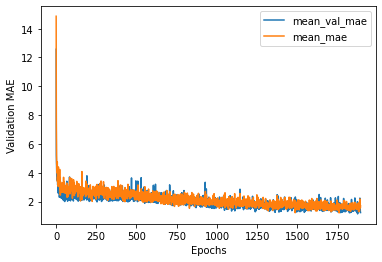

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history24) + 1), val_average_mae_history24,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history24) + 1), average_mae_history24,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [14]:
val_loss24 = [np.mean([x[i] for x in VAL_MSE24]) for i in range(1892)]
loss24 = [np.mean([x[i] for x in MSE24]) for i in range(1892)]

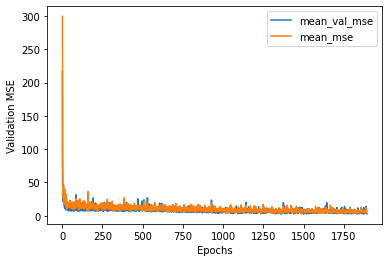

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history24) + 1), val_loss24, label='mean_val_mse')
plt.plot(range(1, len(average_mae_history24) + 1), loss24,  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

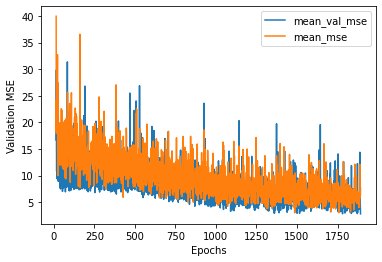

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(15, len(val_average_mae_history24) + 1), val_loss24[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history24) + 1), loss24[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [17]:
np.array(val_loss24).min()

2.8028408885002136

In [18]:
j, = np.where(np.array(val_loss24) ==np.array(val_loss24).min())

In [19]:
j

array([1891])

In [20]:
val_average_mae_history16 = [np.mean([x[i] for x in VAL_MAE16]) for i in range(1924)]
average_mae_history16 = [np.mean([x[i] for x in MAE16]) for i in range(1924)]

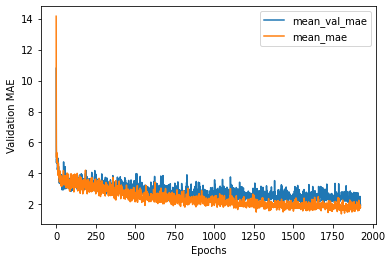

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history16) + 1), val_average_mae_history16,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history16) + 1), average_mae_history16,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [22]:
val_loss16 = [np.mean([x[i] for x in VAL_MSE16]) for i in range(1924)]
loss16 = [np.mean([x[i] for x in MSE16]) for i in range(1924)]

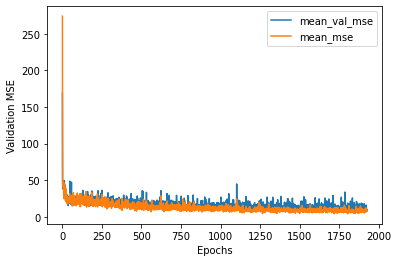

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history16) + 1), val_loss16, label='mean_val_mse')
plt.plot(range(1, len(average_mae_history16) + 1), loss16,  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

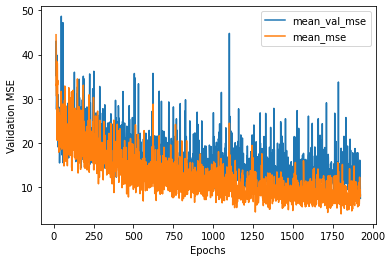

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(15, len(val_average_mae_history16) + 1), val_loss16[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history16) + 1), loss16[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [25]:
np.array(val_loss16).min()

7.40150294303894

In [26]:
j, = np.where(np.array(val_loss16) ==np.array(val_loss16).min())

In [27]:
j

array([1923])

In [28]:
val_average_mae_history12 = [np.mean([x[i] for x in VAL_MAE12]) for i in range(1970)]
average_mae_history12 = [np.mean([x[i] for x in MAE12]) for i in range(1970)]

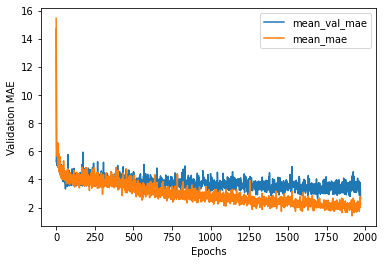

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history12) + 1), val_average_mae_history12,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history12) + 1), average_mae_history12,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [30]:
np.array(val_average_mae_history12).min()

2.6425384759902952

In [31]:
j, = np.where(np.array(val_average_mae_history12) ==np.array(val_average_mae_history12).min())

In [32]:
j

array([1969])

In [33]:
val_loss12 = [np.mean([x[i] for x in VAL_MSE12]) for i in range(1970)]
loss12 = [np.mean([x[i] for x in MSE12]) for i in range(1970)]

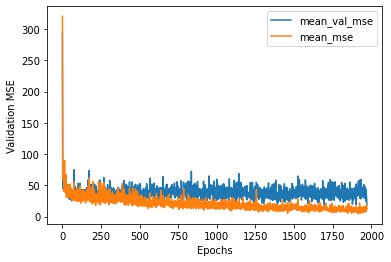

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history12) + 1), val_loss12, label='mean_val_mse')
plt.plot(range(1, len(average_mae_history12) + 1), loss12,  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

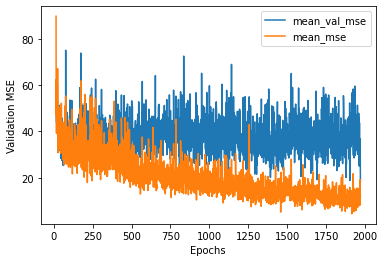

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(15, len(val_average_mae_history12) + 1), val_loss12[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history12) + 1), loss12[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [36]:
np.array(val_loss12).min()

18.63536195755005

In [37]:
j, = np.where(np.array(val_loss12) ==np.array(val_loss12).min())

In [38]:
j

array([1969])

In [39]:
val_average_mae_history8 = [np.mean([x[i] for x in VAL_MAE8]) for i in range(1511)]
average_mae_history8 = [np.mean([x[i] for x in MAE8]) for i in range(1511)]

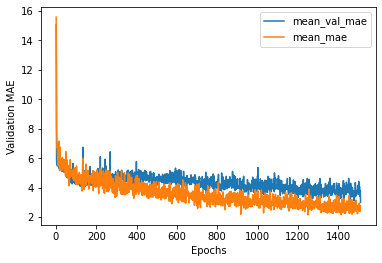

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history8) + 1), val_average_mae_history8,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history8) + 1), average_mae_history8,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [41]:
np.array(val_average_mae_history8).min()

3.0126725912094114

In [42]:
j, = np.where(np.array(val_average_mae_history8) ==np.array(val_average_mae_history8).min())

In [43]:
j

array([1510])

In [44]:
val_loss8 = [np.mean([x[i] for x in VAL_MSE8]) for i in range(1511)]
loss8 = [np.mean([x[i] for x in MSE8]) for i in range(1511)]

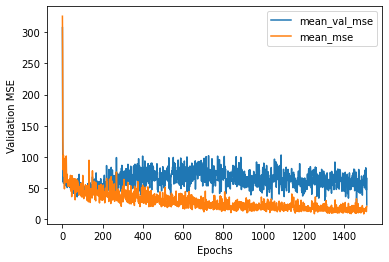

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history8) + 1), val_loss8, label='mean_val_mse')
plt.plot(range(1, len(average_mae_history8) + 1), loss8,  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

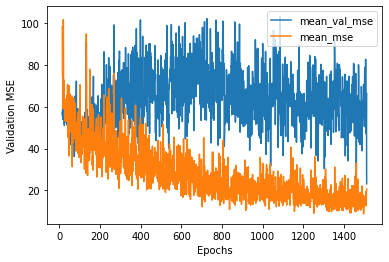

In [46]:
import matplotlib.pyplot as plt
plt.plot(range(15, len(val_average_mae_history8) + 1), val_loss8[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history8) + 1), loss8[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [47]:
np.array(val_loss8).min()

23.16151452064514

In [48]:
j, = np.where(np.array(val_loss8) ==np.array(val_loss8).min())

In [49]:
j

array([1510])

In [50]:
val_average_mae_history6 = [np.mean([x[i] for x in VAL_MAE6]) for i in range(1124)]
average_mae_history6 = [np.mean([x[i] for x in MAE6]) for i in range(1124)]

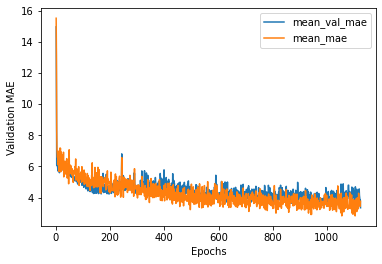

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history6) + 1), val_average_mae_history6,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history6) + 1), average_mae_history6,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [52]:
np.array(val_average_mae_history6).min()

3.293859100341797

In [53]:
j, = np.where(np.array(val_average_mae_history6) ==np.array(val_average_mae_history6).min())

In [54]:
j

array([962])

In [55]:
val_loss6 = [np.mean([x[i] for x in VAL_MSE6]) for i in range(1124)]
loss6 = [np.mean([x[i] for x in MSE6]) for i in range(1124)]

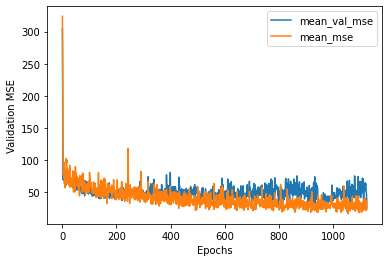

In [56]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history6) + 1), val_loss6, label='mean_val_mse')
plt.plot(range(1, len(average_mae_history6) + 1), loss6,  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

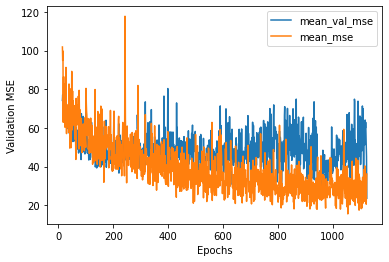

In [57]:
import matplotlib.pyplot as plt
plt.plot(range(15, len(val_average_mae_history6) + 1), val_loss6[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history6) + 1), loss6[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [58]:
np.array(val_loss8).min()

23.16151452064514

In [59]:
j, = np.where(np.array(val_loss6) ==np.array(val_loss6).min())

In [60]:
j

array([1123])

In [61]:
val_average_mae_history2 = [np.mean([x[i] for x in VAL_MAE2]) for i in range(1073)]
average_mae_history2 = [np.mean([x[i] for x in MAE2]) for i in range(1073)]

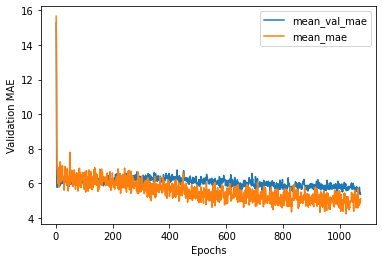

In [62]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history2) + 1), val_average_mae_history2,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history2) + 1), average_mae_history2,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [63]:
np.array(val_average_mae_history2).min()

5.354200458526611

In [64]:
j, = np.where(np.array(val_average_mae_history2) ==np.array(val_average_mae_history2).min())

In [65]:
j

array([1072])

In [66]:
val_loss2 = [np.mean([x[i] for x in VAL_MSE2]) for i in range(1073)]
loss2 = [np.mean([x[i] for x in MSE2]) for i in range(1073)]

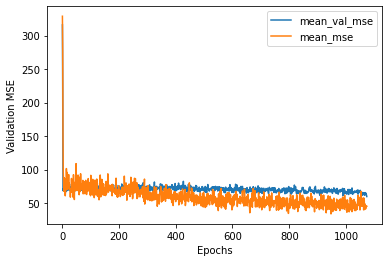

In [67]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(val_average_mae_history2) + 1), val_loss2, label='mean_val_mse')
plt.plot(range(1, len(average_mae_history2) + 1), loss2,  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

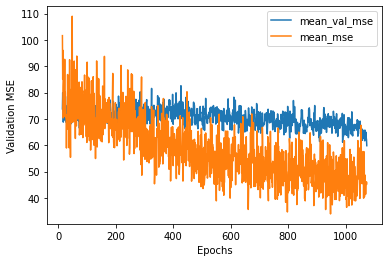

In [68]:
import matplotlib.pyplot as plt
plt.plot(range(15, len(val_average_mae_history2) + 1), val_loss2[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history2) + 1), loss2[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [69]:
np.array(val_loss2).min()

59.833090209960936

In [70]:
j, = np.where(np.array(val_loss2) ==np.array(val_loss2).min())

In [71]:
j

array([1072])

Files for saving weights and training final ANN models

In [72]:
weights_file24 = 'weights24_direct.h5'
weights_file16 = 'weights16_direct.h5'
weights_file12 = 'weights12_direct.h5'
weights_file8 = 'weights8_direct.h5'
weights_file6 = 'weights6_direct.h5'
weights_file2 = 'weights2_direct.h5'
callback24 = tf.keras.callbacks.ModelCheckpoint(weights_file24, monitor='acc', mode='max')
callback16 = tf.keras.callbacks.ModelCheckpoint(weights_file16, monitor='acc', mode='max')
callback12 = tf.keras.callbacks.ModelCheckpoint(weights_file12, monitor='acc', mode='max')
callback8 = tf.keras.callbacks.ModelCheckpoint(weights_file8, monitor='acc', mode='max')
callback6 = tf.keras.callbacks.ModelCheckpoint(weights_file6, monitor='acc', mode='max')
callback2 = tf.keras.callbacks.ModelCheckpoint(weights_file2, monitor='acc', mode='max')

In [73]:
model24 = build_model(x_train_24, (128, 128, 64, 1), (0.1, 0.1, 0.3))
model16 = build_model(x_train_16, (128, 128, 128, 1), (0.1, 0.3, 0.3))
model12 = build_model(x_train_12, (96, 96, 64, 1), (0.1, 0.1, 0.4))
model8 = build_model(x_train_8, (128, 64, 64, 1), (0.1, 0.3, 0.5))
model6 = build_model(x_train_6, (128, 128, 64, 1), (0.1, 0.5, 0.5))
model2 = build_model(x_train_2, (128, 128, 64, 1), (0.3, 0.3, 0.5))
history24 = model24.fit(x_train_24, y_train_24, epochs=1892, batch_size=1, callbacks = [callback24])
history16 = model16.fit(x_train_16, y_train_16, epochs=1924, batch_size=1, callbacks = [callback16])
history12 = model12.fit(x_train_12, y_train_12, epochs=1970, batch_size=1, callbacks = [callback12])
history8 = model8.fit(x_train_8, y_train_8, epochs=1511, batch_size=1, callbacks = [callback8])
history6 = model6.fit(x_train_6, y_train_6, epochs=1124, batch_size=1, callbacks = [callback6])
history2 = model2.fit(x_train_2, y_train_2, epochs=1073, batch_size=1, callbacks = [callback2])

Выходные данные были обрезаны до нескольких последних строк (5000).
40/40 [==============================] - 0s 4ms/step - loss: 22.7082 - mae: 3.3527 - mape: 21.8046
Epoch 1210/1511
40/40 [==============================] - 0s 5ms/step - loss: 16.1357 - mae: 3.0434 - mape: 21.6830
Epoch 1211/1511
40/40 [==============================] - 0s 5ms/step - loss: 21.8952 - mae: 3.3589 - mape: 25.0875
Epoch 1212/1511
40/40 [==============================] - 0s 4ms/step - loss: 10.1225 - mae: 2.4871 - mape: 18.7611
Epoch 1213/1511
40/40 [==============================] - 0s 4ms/step - loss: 13.9216 - mae: 2.6377 - mape: 17.9119
Epoch 1214/1511
40/40 [==============================] - 0s 4ms/step - loss: 18.2260 - mae: 2.9170 - mape: 18.9671
Epoch 1215/1511
40/40 [==============================] - 0s 6ms/step - loss: 12.7863 - mae: 2.4656 - mape: 18.1432
Epoch 1216/1511
40/40 [==============================] - 0s 5ms/step - loss: 14.6141 - mae: 2.6903 - mape: 21.6124
Epoch 1217/1511
40/40 [=====

Saving ANN Models

In [74]:
def saves_model(str1, str2, model):
  json_file = str1
  model_json = model.to_json()

  with open(json_file, 'w') as f:
    f.write(model_json)

  with open(json_file, 'r') as f:
    loaded_model = tf.keras.models.model_from_json(f.read())
    
  loaded_model.load_weights(str2)

In [75]:
saves_model('model24_direct.json', 'weights24_direct.h5', model24)
saves_model('model16_direct.json', 'weights16_direct.h5', model16)
saves_model('model12_direct.json', 'weights12_direct.h5', model12)
saves_model('model8_direct.json', 'weights8_direct.h5', model8)
saves_model('model6_direct.json', 'weights6_direct.h5', model6)
saves_model('model2_direct.json', 'weights2_direct.h5', model2)